<a href="https://colab.research.google.com/github/LucasTerzi/ENG1111/blob/main/RedeNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

#divisao treino e teste
from sklearn.model_selection import train_test_split

#modelos
from sklearn.neural_network import MLPClassifier

#metricas
from sklearn.metrics import accuracy_score, classification_report, roc_curve

#validacao
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("movies_metadata.csv",header=0,index_col=None)
data.drop(columns=['adult','homepage','belongs_to_collection','vote_count','release_date','title','original_title','genres','id','status','imdb_id','poster_path','spoken_languages', 'tagline','video','overview','original_language','production_companies','production_countries'],inplace=True)
data.dropna(inplace=True)

data.head(10)



,budget,popularity,revenue,runtime,vote_average
0,30000000,21.946943,373554033.0,81.0,7.7
1,65000000,17.015539,262797249.0,104.0,6.9
2,0,11.7129,0.0,101.0,6.5
3,16000000,3.859495,81452156.0,127.0,6.1
4,0,8.387519,76578911.0,106.0,5.7
5,60000000,17.924927,187436818.0,170.0,7.7
6,58000000,6.677277,0.0,127.0,6.2
7,0,2.561161,0.0,97.0,5.4
8,35000000,5.23158,64350171.0,106.0,5.5
9,58000000,14.686036,352194034.0,130.0,6.6


In [ ]:

#def genero(v):
#  return str(v[0:2])

#seriesgen=data['genres'].apply(genero)
#data['genres']=seriesgen
#data=data['genres'].loc[data['genres']!='[]']

#data.head()


In [ ]:
def transformarevenue(s):
  return int(s)

seriesrev=data['revenue'].apply(transformarevenue)
data['revenue']=seriesrev

seriesrevenue=data['revenue'].loc[data['revenue']>100000]

#print(seriesrevenue.sort_values(ascending=True))

#seriesrevenue.head(10)

data['revenue']=seriesrevenue

data.dropna(inplace=True)

seriesrev=pd.cut(data['revenue'],bins=10,labels=[1,2,3,4,5,6,7,8,9,10])
data['revenue']=seriesrev

print(data['revenue'].sort_values())


10343     1
14777     1
14774     1
14768     1
14767     1
         ..
28830     6
17818     6
1639      7
26555     8
14551    10
Name: revenue, Length: 6823, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


In [ ]:
#seriesrev=pd.cut(data['revenue'],bins=10,labels=[1,2,3,4,5,6,7,8,9,10])
#data['revenue']=seriesrev
#data.head(10)

In [ ]:
def transformapop(s):
  return float(s)

seriespop=data['popularity'].apply(transformapop)
data['popularity']=seriespop

In [ ]:
def transformabudget (s):
  return int(s)

seriesbudget1=data['budget'].apply(transformabudget)
data['budget']=seriesbudget1

seriesbudget2=data['budget'].loc[data['budget']>100000]

data['budget']=seriesbudget2

#print(seriesbudget.sort_values(ascending=True))



In [ ]:
data.nunique()


budget           622
popularity      6818
revenue            9
runtime          163
vote_average      74
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:

data.head(100)

,budget,popularity,revenue,runtime,vote_average
0,30000000.0,21.946943,2,81.0,7.7
1,65000000.0,17.015539,1,104.0,6.9
3,16000000.0,3.859495,1,127.0,6.1
5,60000000.0,17.924927,1,170.0,7.7
8,35000000.0,5.231580,1,106.0,5.5
...,...,...,...,...,...
244,10500000.0,2.688562,1,113.0,6.0
249,60000000.0,11.970205,1,123.0,7.2
250,14000000.0,1.596058,1,139.0,5.2
252,60000000.0,6.710215,1,109.0,4.7


In [ ]:
data.isnull().sum()


budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5121 entries, 0 to 45422
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   budget        5121 non-null   float64 
 1   popularity    5121 non-null   float64 
 2   revenue       5121 non-null   category
 3   runtime       5121 non-null   float64 
 4   vote_average  5121 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 205.4 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_revenue = LabelEncoder()
data['revenue'] = le_revenue.fit_transform(data['revenue'])
data['revenue'].unique()

array([1, 0, 2, 3, 6, 4, 8, 5, 7])

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5121 entries, 0 to 45422
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        5121 non-null   float64
 1   popularity    5121 non-null   float64
 2   revenue       5121 non-null   int64  
 3   runtime       5121 non-null   float64
 4   vote_average  5121 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 240.0 KB


In [ ]:
#le_popularity = LabelEncoder()
#data['popularity'] = le_popularity.fit_transform(data['popularity'])
#data['popularity'].unique()

In [ ]:
#le_title = LabelEncoder()
#data['title'] = le_title.fit_transform(data['title'])
#data['title'].unique()

                budget  popularity   revenue   runtime  vote_average
budget        1.000000    0.299742  0.626342  0.179930     -0.017312
popularity    0.299742    1.000000  0.402883  0.082474      0.161213
revenue       0.626342    0.402883  1.000000  0.158674      0.147471
runtime       0.179930    0.082474  0.158674  1.000000      0.331137
vote_average -0.017312    0.161213  0.147471  0.331137      1.000000


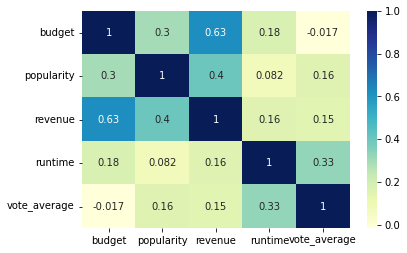

In [ ]:
import seaborn as sb

print(data.corr())
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()


In [ ]:
y = data['revenue']
X = data.drop('revenue', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("Shape X_train", X_train.shape)
print("Shape X_test",X_test.shape)
print("Shape y_train",y_train.shape)
print("Shape y_test",y_test.shape)

Shape X_train (4096, 4)
Shape X_test (1025, 4)
Shape y_train (4096,)
Shape y_test (1025,)


In [ ]:
#gbc = GradientBoostingClassifier()
#gbc.fit(X_train, y_train)

#gbc_predictions = gbc.predict(X_test)

#print(f"A precisao do teste usando GradientBoostingClassifier foi de {accuracy_score(y_test, gbc_predictions)*100:.2f}% ")


In [ ]:
#gnb = GaussianNB()
#gnb.fit(X_train, y_train)

#gnb_predictions = gnb.predict(X_test)
#print(f"A precisao do teste usando GaussianNB foi de {accuracy_score(y_test, gnb_predictions)*100:.2f}% ")


In [ ]:
#desc_tree = DecisionTreeClassifier()
#desc_tree.fit(X_train, y_train)

#dt_predictions = desc_tree.predict(X_test)
#print(f"A precisao do teste usando DecisionTreeClassifier foi de {accuracy_score(y_test, dt_predictions)*100:.2f}% ")


In [ ]:
#random_forest = RandomForestClassifier(n_estimators=100)
#random_forest.fit(X_train, y_train)

#rf_predictions = random_forest.predict(X_test)
#print(f"A precisao do teste usando RandomForestClassifier foi de {accuracy_score(y_test, rf_predictions)*100:.2f}% ")


In [ ]:
#log_reg = LogisticRegression()
#log_reg.fit(X_train, y_train)

#lr_predictions = log_reg.predict(X_test)
#print(f"A precisao do teste usando LogisticRegression foi de {accuracy_score(y_test, lr_predictions)*100:.2f}% ")


In [ ]:
#desc_tree = DecisionTreeClassifier()
#desc_tree.fit(X_train, y_train)

#dt_predictions = desc_tree.predict(X_test)
#print(f"A precisao do teste usando DecisionTreeClassifier foi de {accuracy_score(y_test, dt_predictions)*100:.2f}% ")


In [ ]:
from sklearn.neural_network import MLPClassifier
X = X_train
y = y_train

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
#X[:, 4] = le_title.transform(X[:,4])
#X[:, 7] = le_posteam_type.transform(X[:,7])
#X = X.astype(float)
#X


In [ ]:
X

,budget,popularity,runtime,vote_average
6514,6000000.0,5.586920,103.0,6.8
16692,10000000.0,7.787593,91.0,6.1
154,11000000.0,5.391556,91.0,5.9
45139,50000000.0,33.694599,86.0,5.8
7834,29000000.0,15.239013,123.0,7.7
...,...,...,...,...
40261,2115000.0,0.109913,92.0,7.0
13798,40000000.0,8.058337,108.0,6.7
4844,16000000.0,9.101896,89.0,5.5
10543,22000000.0,10.600475,108.0,6.1


In [ ]:
y_predict = clf.predict(X)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = y_predict
y_true = y_train

accuracy_score(y_true, y_pred,normalize=True)


0.9150390625

In [ ]:
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)